# 1. Importer les packages

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Importer les données

In [2]:
df = pd.read_parquet('/kaggle/input/energy1/df_Energy.gzip') 

print(df.shape)

df.head()

(1563, 41)


,Years,PropertyGFATotal,NumberofFloors,SiteEnergyUse(kBtu),PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,88434,12,7226362.5,0,88434,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,103566,11,8387933.0,15064,88502,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,47,956110,41,72587024.0,196718,759392,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,90,61320,10,6794584.0,0,61320,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,36,175580,18,14172606.0,62000,113580,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


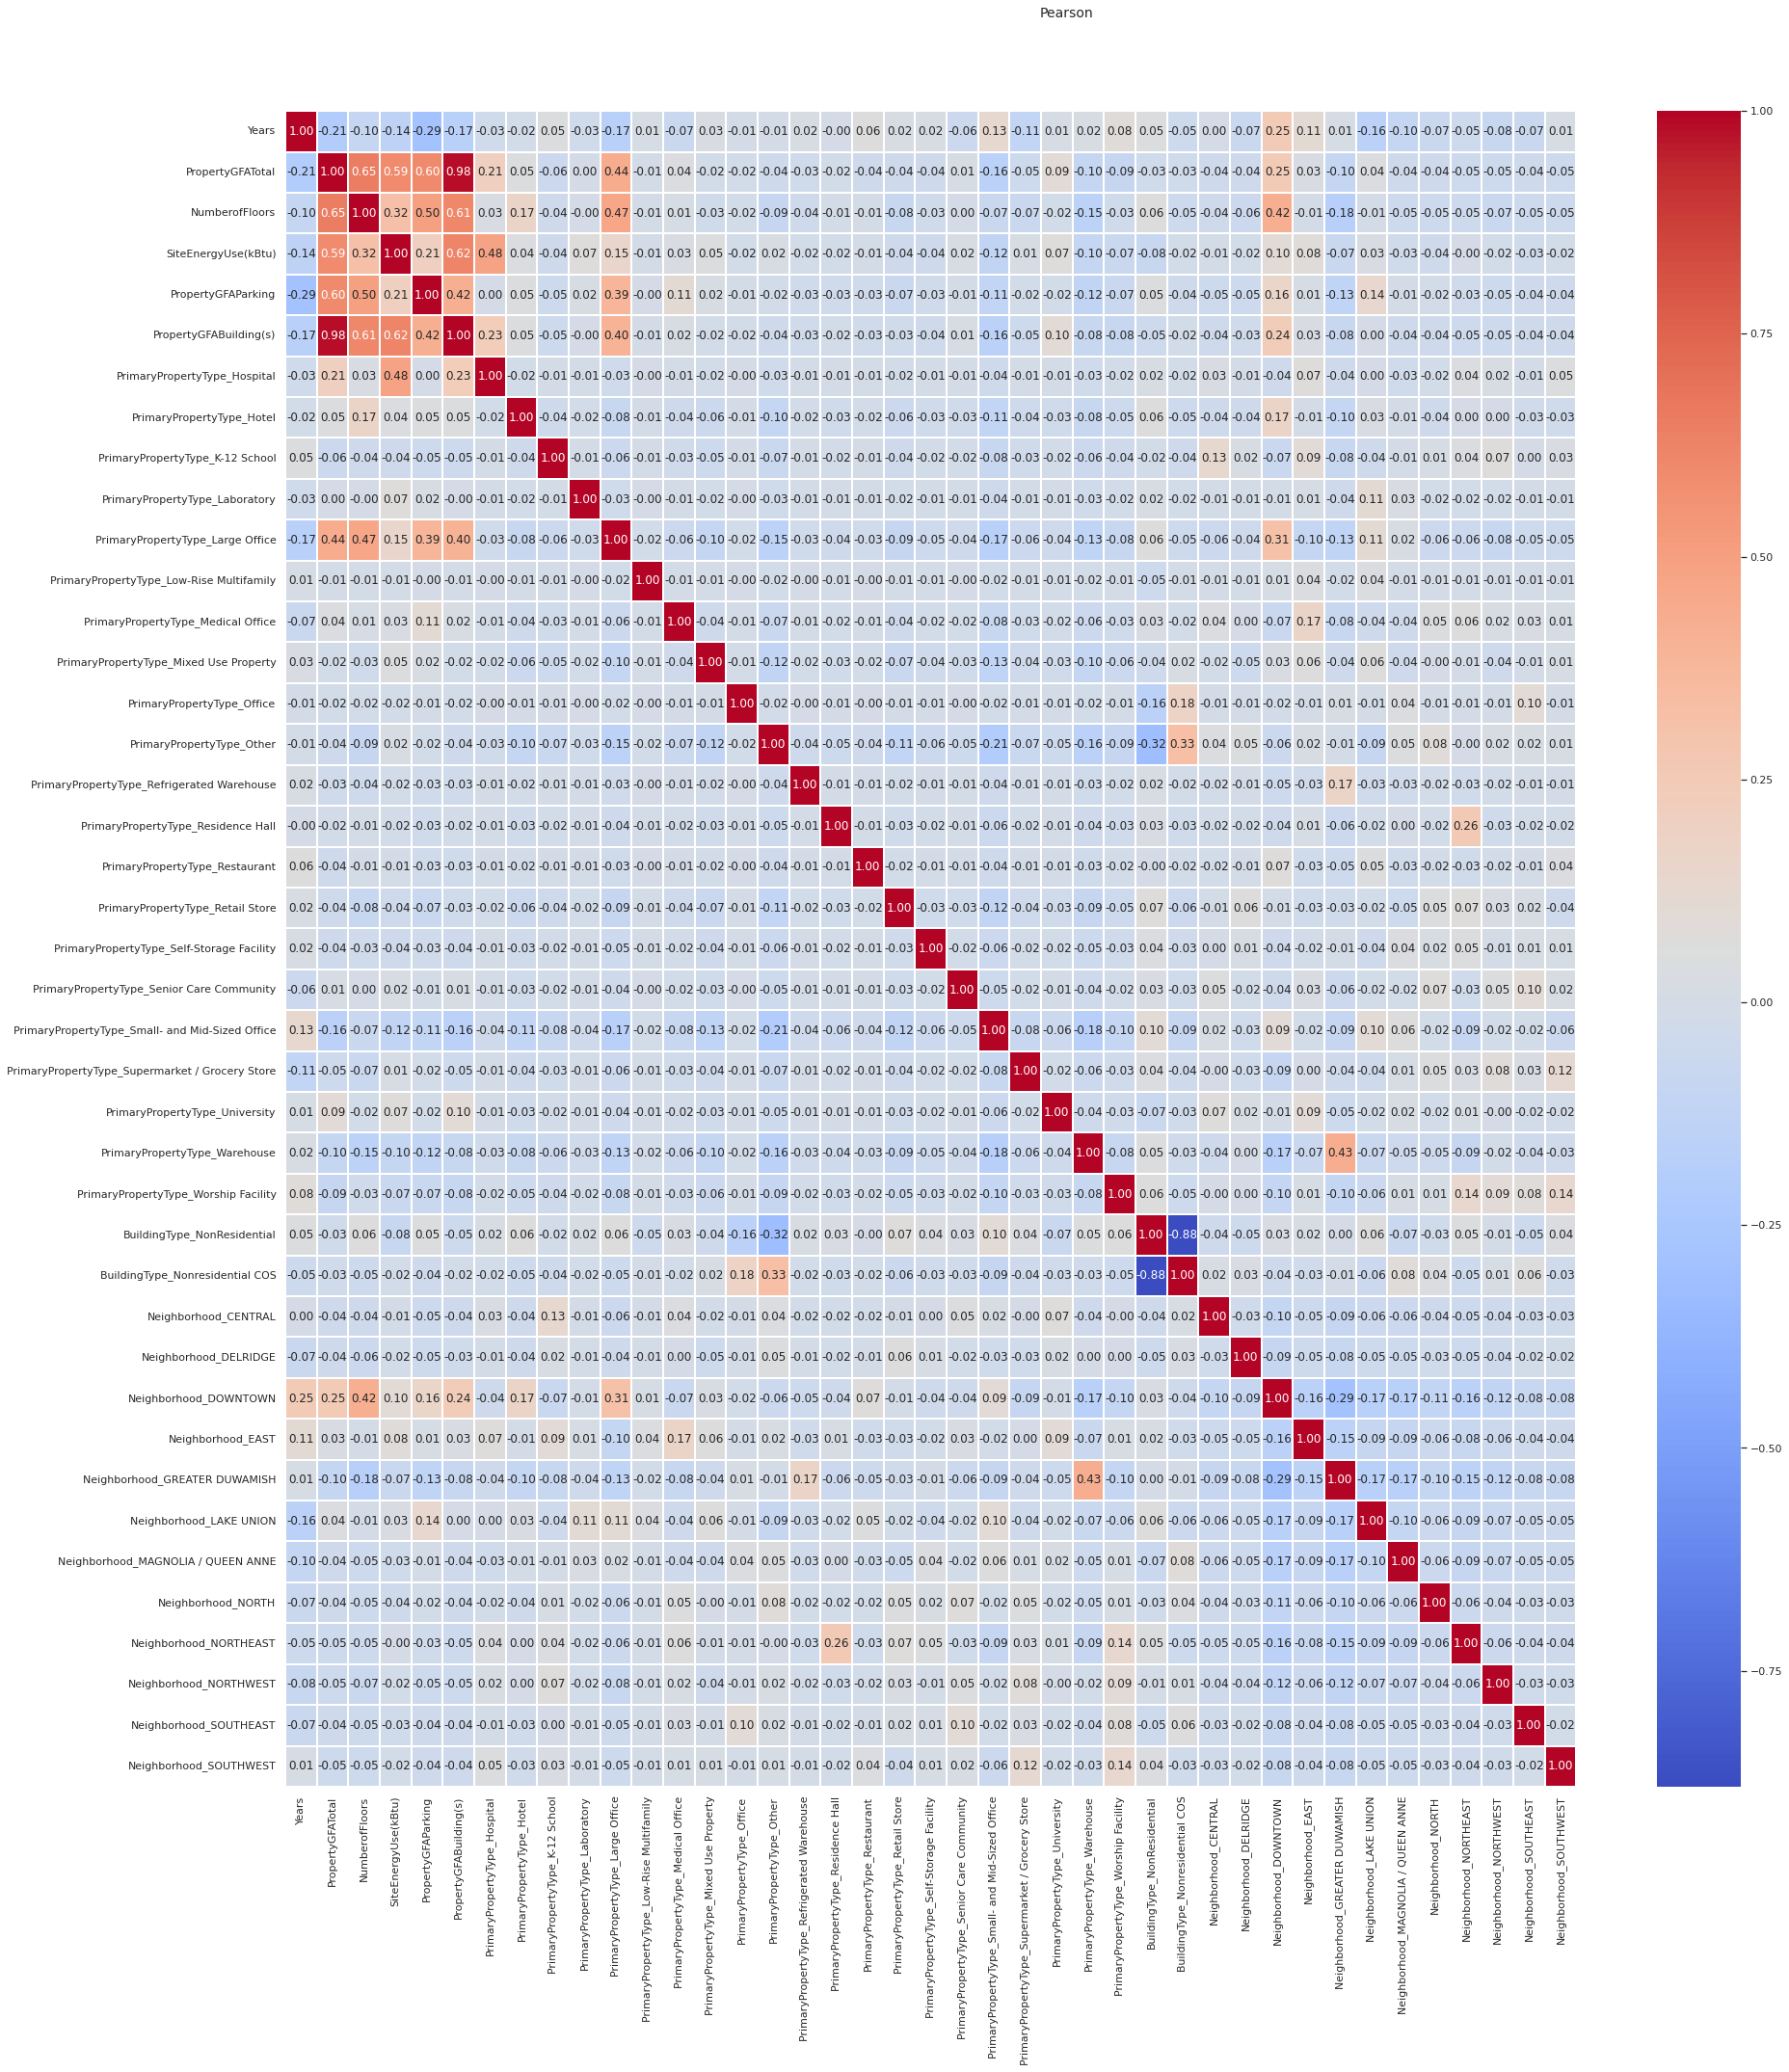

In [3]:
# Correlation Matrix Heatmap 
# DataFrame.corr(method='pearson', min_periods=1)

f, ax = plt.subplots(figsize=(30,30))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pearson', fontsize=14)

In [4]:
df = df.copy()

# 3. Visualisation des données à l'aide de Seaborn Pairplots

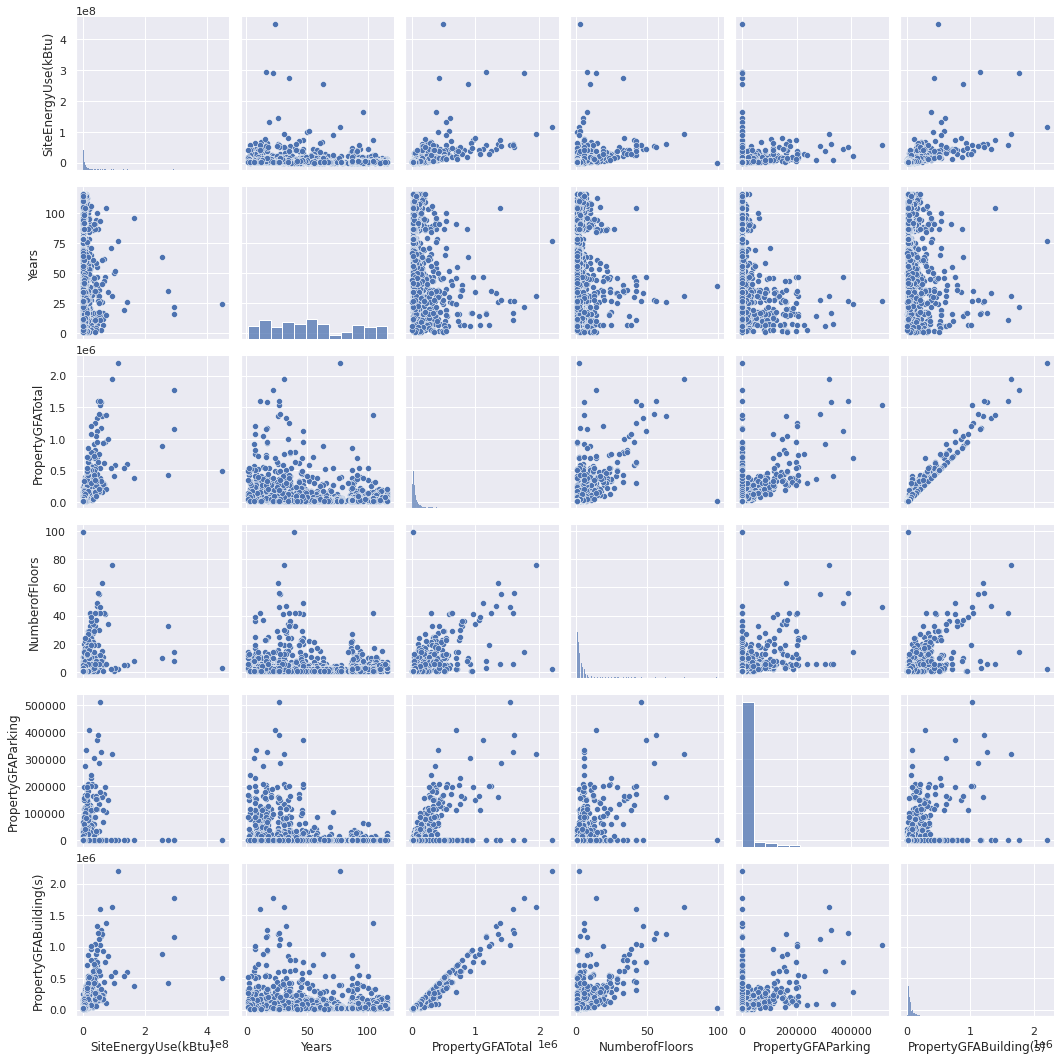

In [5]:
g = sns.pairplot(df[['SiteEnergyUse(kBtu)', 'Years', 'PropertyGFATotal', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)']]) 

In [6]:
df = df.drop(['PropertyGFABuilding(s)'], axis=1)

In [7]:
df.columns

Index(['Years', 'PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)',
       'PropertyGFAParking', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worshi

# 4. Vérifier la distribution des paramètres

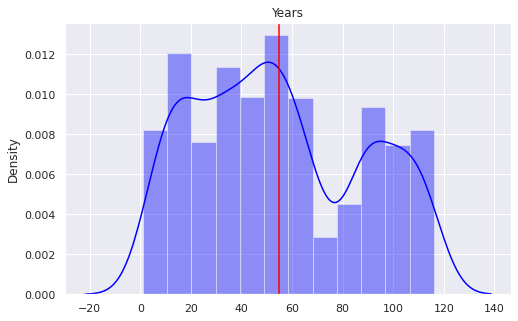

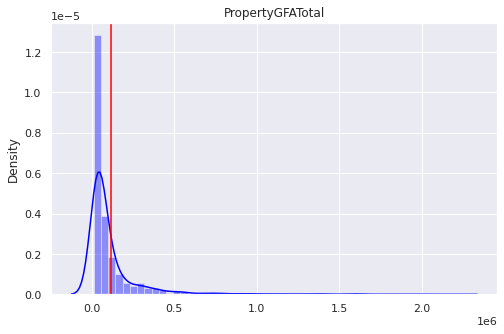

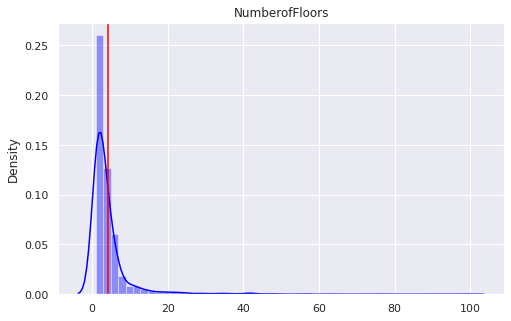

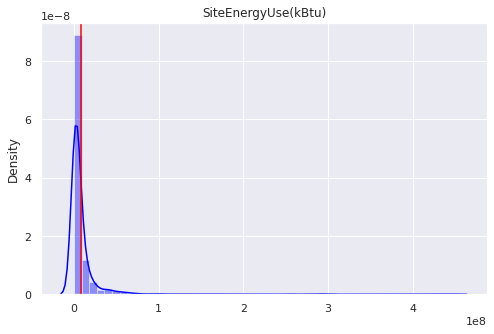

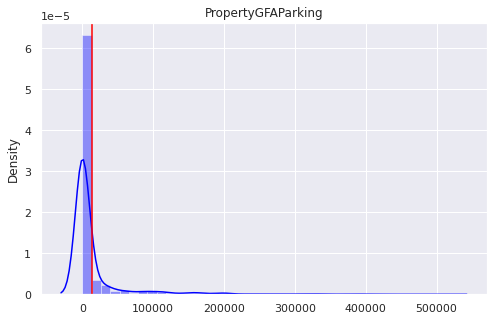

In [8]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in df[['Years', 'PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)','PropertyGFAParking']]:
    x = df[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = df[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

# 5. Sélection des paramètres les plus importantes

In [9]:
df.head()

,Years,PropertyGFATotal,NumberofFloors,SiteEnergyUse(kBtu),PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,88434,12,7226362.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,103566,11,8387933.0,15064,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,47,956110,41,72587024.0,196718,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,90,61320,10,6794584.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,36,175580,18,14172606.0,62000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['Years', 'PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)',
       'PropertyGFAParking', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worshi

# 6. Passage au log

In [11]:
# df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions', 'PropertyGFAParking', 'PropertyGFABuilding(s)']] = df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions', 'PropertyGFAParking', 'PropertyGFABuilding(s)']]
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
df[['PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)','PropertyGFAParking']] = transformer.fit_transform(df[['PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)','PropertyGFAParking']])
#https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431

In [12]:
df

,Years,PropertyGFATotal,NumberofFloors,SiteEnergyUse(kBtu),PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,11.390023,2.564949,15.793246,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,11.547974,2.484907,15.942305,9.620129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,47,13.770629,3.737670,18.100297,12.189532,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,90,11.023878,2.397895,15.731637,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,36,12.075856,2.944439,16.466822,11.034906,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,26,9.416948,0.693147,13.652694,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3372,12,9.680406,0.693147,13.764509,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3373,42,9.484785,0.693147,15.567472,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3374,27,9.554072,0.693147,13.486273,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
df = df.copy()

# 7. Vérifier distribution après passage au log

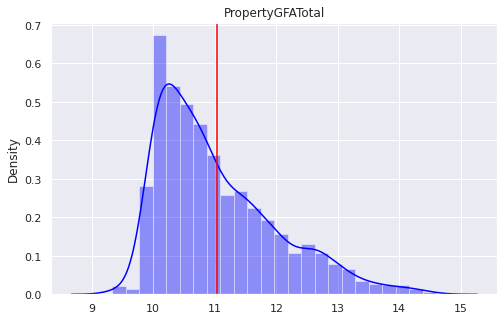

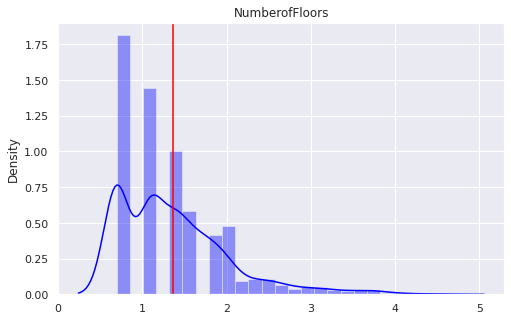

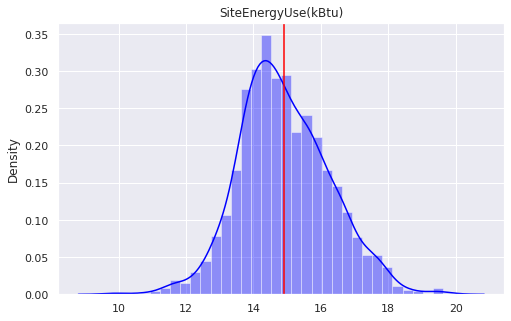

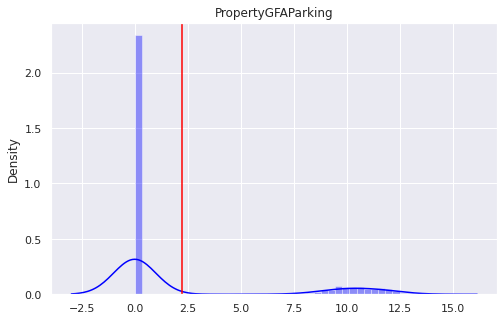

In [14]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in df[['PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)','PropertyGFAParking']]:
    x = df[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = df[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [15]:
# check the quick stats df ()
df.describe()

,Years,PropertyGFATotal,NumberofFloors,SiteEnergyUse(kBtu),PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,54.763916,11.032088,1.362233,14.916841,2.233651,0.006398,0.048624,0.027511,0.006398,0.110685,0.001919,0.024952,0.072297,0.001919,0.157390,0.007678,0.013436,0.007678,0.058221,0.017914,0.012796,0.186180,0.024952,0.014075,0.119642,0.045425,0.930902,0.054383,0.030710,0.025592,0.229687,0.074856,0.214331,0.091491,0.091491,0.037748,0.074856,0.048624,0.020473,0.020473
std,32.927285,0.963283,0.658623,1.341884,4.326063,0.079756,0.215150,0.163620,0.079756,0.313842,0.043783,0.156029,0.259062,0.043783,0.364284,0.087313,0.115168,0.087313,0.234237,0.132682,0.112429,0.389377,0.156029,0.117840,0.324646,0.208302,0.253702,0.226844,0.172587,0.157965,0.420766,0.263243,0.410489,0.288398,0.288398,0.190647,0.263243,0.215150,0.141658,0.141658
min,1.000000,9.331318,0.693147,9.729723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,10.268165,0.693147,14.009854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,10.772414,1.098612,14.794396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,87.000000,11.560995,1.609438,15.794208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,116.000000,14.603968,4.605170,19.921163,13.147269,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [16]:
df.columns

Index(['Years', 'PropertyGFATotal', 'NumberofFloors', 'SiteEnergyUse(kBtu)',
       'PropertyGFAParking', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worshi

In [17]:
# check for infinite numbers 
# np.isinf(df_Energy).values.sum()

In [18]:
# # Normalisation de donnes 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_normalized = scaler.fit_transform(df)

In [19]:
#Standarisation de donnes 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [20]:
df = pd.DataFrame(df, columns = ['SiteEnergyUse(kBtu)', 'Years', 'PropertyGFATotal', 'NumberofFloors',
       'PropertyGFAParking', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'Neighborhood_CENTRAL',
       'Neighborhood_DELRIDGE', 'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST'])


In [21]:
df.shape

(1563, 40)

# 8. Split donnes X & y

In [22]:
# Split the data into X & y

X = df.drop(['SiteEnergyUse(kBtu)'], axis = 1)
X_columns = df.drop(['SiteEnergyUse(kBtu)'], axis = 1)
y = df['SiteEnergyUse(kBtu)'].astype(int)

print(X.shape)
print(y.shape)

(1563, 39)
(1563,)


In [23]:
X.head()

,Years,PropertyGFATotal,NumberofFloors,PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0.371697,1.826690,0.653324,-0.516489,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
1,0.535721,1.705121,0.764441,1.707983,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
2,2.843835,3.607823,2.373136,2.302108,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
3,-0.008526,1.572968,0.607397,-0.516489,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
4,1.083899,2.403061,1.155447,2.035123,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573


In [24]:
y.value_counts()

 0    878
 1    375
-1    310
Name: SiteEnergyUse(kBtu), dtype: int64

# 9.  K Fold Cross validation plusieurs modèles 

<class 'sklearn.tree._classes.DecisionTreeClassifier'> [0.552716 0.571885 0.619808 0.560897 0.573718]
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.5758048660604571



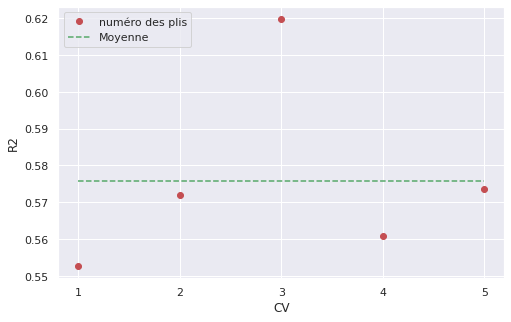

<class 'sklearn.linear_model._base.LinearRegression'> [0.217070 0.274660 0.250584 0.253616 0.325887]
<class 'sklearn.linear_model._base.LinearRegression'> 0.2643633018766522



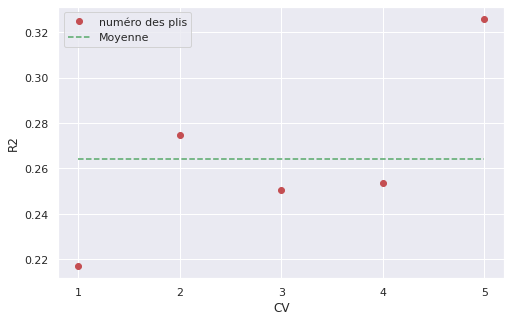

<class 'sklearn.linear_model._ridge.Ridge'> [0.217194 0.274874 0.250748 0.253644 0.325899]
<class 'sklearn.linear_model._ridge.Ridge'> 0.2644716120890106



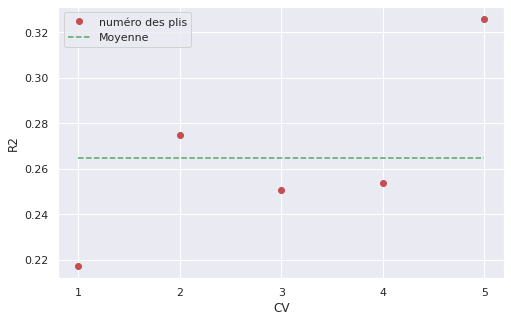

<class 'sklearn.linear_model._coordinate_descent.Lasso'> [-0.011672 -0.010507 -0.006485 -0.001765 -0.000912]
<class 'sklearn.linear_model._coordinate_descent.Lasso'> -0.006268261456962776



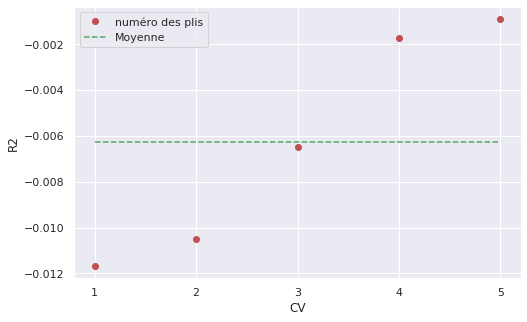

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> [0.235164 0.268068 0.271499 0.327319 0.298257]
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 0.28006119714441924



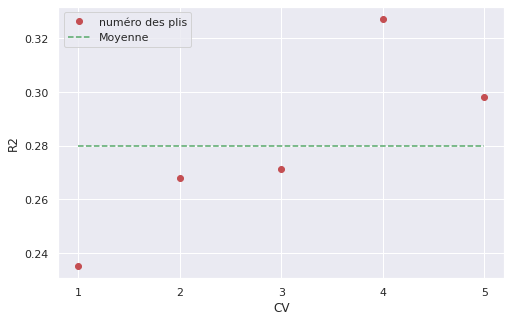

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> [0.120624 0.110167 0.110150 0.073025 0.283116]
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> 0.13941621378927205



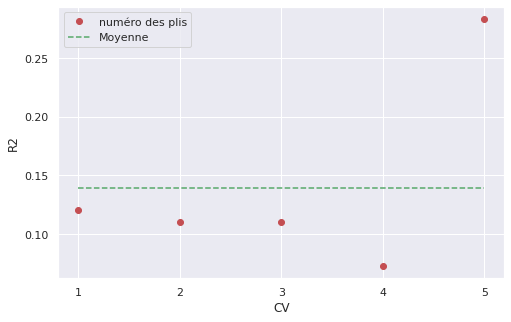

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve


#retrieve the model to be evaluate
model_dict = {'dt': DecisionTreeClassifier, 'lm': LinearRegression, 'ridge' : Ridge, 'lasso': Lasso, 'gbr': GradientBoostingRegressor, 'mlpregr': MLPRegressor, }

# Create range of values for parameter
param_range = np.arange(1, 200, 2)


for i in model_dict.values():
    
    # configurer la procedure cross-validaion
    kfold_validation=KFold(n_splits=5, shuffle=True, random_state=10)

    output = i()
    
    #definir les resultats 
    results=cross_val_score(output,X,y,cv=kfold_validation)
    
    
    print(f'{i}', results)
    print(f'{i}', np.mean(results))
    print('')


    fig, ax = plt.subplots()
    Results = results
    Mean = [np.mean(results)]*len(results)
    
    # Plot les donnes
    plt.plot(Results, 'ro', label='numéro des plis', marker='o')
    
    # Plot the average line
    plt.plot(Mean, 'g', label='Moyenne', linestyle='--')
    
    plt.xticks(np.arange(len(Results)), np.arange(1, len(Results)+1))
    
    # Make a legend
    ax.legend(loc = 'upper left')
    ax.set_xlabel("CV")
    ax.set_ylabel("R2")
    plt.show()

# 10. Scoring plusieurs modèles

In [26]:
# import libraries 
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
# from sklearn.compose import TransformedTar_dummiesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn import tree, model_selection
import math


# models 
LR = linear_model.LinearRegression ()
LASSO = linear_model.Lasso ()
RIDGE = linear_model.Ridge ()
DTR = DecisionTreeRegressor ()
REG = GradientBoostingRegressor ()
MLPR = MLPRegressor ()


kf = model_selection.KFold(n_splits=5,shuffle=True, random_state=10)


# MSE = np.square(np.subtract(X,y)).mean() 
 
# RMSE = math.sqrt(MSE)

#RMSE -> Root Mean Square Error/Erreur quadratique moyenne -> (Des valeurs inférieures de RMSE indiquent un meilleur ajustement)
%time
print('')
print('RMSE')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Linear Regression: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Linear Regression: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Decision Tree chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Decision Tree : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Decision Tree : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" MLPRegressor chaque folds: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print ('')

#MAE -> mean of absolute error values/ average of the absolute error values (plus proche de 0 le meilleur)
%time
print('')
print('MAE')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Regression Linear: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Regression Linear: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" MAE Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')


print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" l'Arbre de décision chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, l'Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, l'Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" MLPRegressor chaque plis: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyen, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print ('')
      
#r2 -> coefficient of determination/coefficient de détermination (The closer the value of r-square to 1, the better is the model fitted)
%time
print('')
print('R2')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne Linear, Regression : {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Linear Regression : {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, Lasso : {cross_val_score(LASSO, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Lasso : {cross_val_score(LASSO, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne,Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Arbre de décision chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" MLPRegressor chaque plis: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2').std()}")
# print(f" KNeighbors : {np.sqrt(-cross_val_score(KNR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.3 µs

RMSE

 Linear Regression chaque plis: [-0.347491 -0.317770 -0.310877 -0.329856 -0.293401]
 Moyenne, Linear Regression: -0.31987881247044264
 Standard Deviation, Linear Regression: 0.01815792637814069

 Lasso chaque plis: [-0.449015 -0.442701 -0.417515 -0.442718 -0.435637]
 Moyenne, Lasso : -0.43751714788091467
 Standard Deviation, Lasso : 0.010860218840159598

 Ridge chaque plis: [-0.347436 -0.317676 -0.310809 -0.329843 -0.293396]
 Moyenne, Ridge : -0.31983196750865434
 Standard Deviation, Ridge : 0.018150282772964103

 Decision Tree chaque plis: [-0.568690 -0.597444 -0.504792 -0.557692 -0.557692]
 Moyenne, Decision Tree : -0.5668407471123126
 Standard Deviation, Decision Tree : 0.02392917353366043

 GradientBoostingRegressor chaque plis: [-0.339457 -0.320043 -0.301887 -0.297228 -0.304075]
 Moyenne, GradientBoostingRegressor : -0.3119690160034531
 Standard Deviation, GradientBoostingRegressor : 0.015406058132043413

 MLPRe

In [27]:
import time

# 11. Réglage des hyperparamètres

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
# warnings.simplefilter("ignore", UserWarning)
# # warnings.warn("once")
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import parallel_backend

# Add a dict of estimator and estimator related parameters in this list
parameters_grid = [
                    {'estimator': [linear_model.LinearRegression()], 
                     'estimator__fit_intercept': [True, False]},
                
                    {'estimator': [linear_model.Lasso()], 
                     'estimator__alpha': [0.1],
                     'estimator__fit_intercept': [True, False]},


                    {'estimator': [linear_model.Ridge()], 
                     'estimator__alpha': [1, 0.1, 0.01, 0.001, 10],
                     'estimator__fit_intercept': [True, False]},
    
                    {'estimator': [GradientBoostingRegressor()], 
                     'estimator__loss':["ls", "lad","huber"],
                        'estimator__learning_rate':[0.005,0.01,0.02],
                        'estimator__n_estimators':[100,1000],
                        'estimator__criterion': ["friedman_mse", "squared_error", "squared_error"]},

                   {'estimator': [MLPRegressor()],
                    'estimator__hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
                            'estimator__max_iter': [200],
                            'estimator__activation': ['identity','logistic','tanh', 'relu'],
                            'estimator__solver': ['sgd','adam'],
                            'estimator__alpha': [0.0001, 0.05],
                            'estimator__learning_rate': ['constant','invscaling','adaptive']},
    
                    {'estimator': [DecisionTreeRegressor()],
                     'estimator__splitter':["best","random"], 
                        'estimator__max_depth': [3,5,10], 
                        'estimator__max_features': ["auto","log2","sqrt",None]}, 

                    ]

estimators = []
scores = []
params = []

for ele in parameters_grid:
    if __name__ == "__main__":
        warnings.filterwarnings("ignore")
        grid = GridSearchCV(Pipeline(steps=[('estimator', ele['estimator'][0])]),param_grid={key:value for key, value in ele.items() if key != 'estimator'},cv = 5, n_jobs=-1, scoring='r2')
        with parallel_backend('multiprocessing'):
            grid.fit(X,y)
        Estimator = str(ele['estimator'])
        Best_Params = str(grid.best_params_)
        Best_Score = str(grid.best_score_)
        estimators.append(Estimator)
        scores.append(Best_Score)
        params.append(Best_Params)
        z = max(scores)
        index = scores.index(z)
        model = estimators[index]
        par = params[index]
    print('Estimator: ' + str(ele['estimator']))
    print('Best Params: ' + str(grid.best_params_))
    print('Best Score: ' + str(grid.best_score_))
    print('')
    print('')

print('The Best Estimator and Score is {} {} {}' .format(model, par, max(scores)))


Estimator: [LinearRegression()]
Best Params: {'estimator__fit_intercept': True}
Best Score: 0.2192189224798356


Estimator: [Lasso()]
Best Params: {'estimator__alpha': 0.1, 'estimator__fit_intercept': True}
Best Score: 0.1303335584178073


Estimator: [Ridge()]
Best Params: {'estimator__alpha': 10, 'estimator__fit_intercept': True}
Best Score: 0.2211287467116505


Estimator: [GradientBoostingRegressor()]
Best Params: {'estimator__criterion': 'friedman_mse', 'estimator__learning_rate': 0.02, 'estimator__loss': 'huber', 'estimator__n_estimators': 100}
Best Score: 0.21700030370688234


Estimator: [MLPRegressor()]
Best Params: {'estimator__activation': 'logistic', 'estimator__alpha': 0.05, 'estimator__hidden_layer_sizes': (120, 80, 40), 'estimator__learning_rate': 'adaptive', 'estimator__max_iter': 200, 'estimator__solver': 'adam'}
Best Score: 0.23800854859481496


Estimator: [DecisionTreeRegressor()]
Best Params: {'estimator__max_depth': 5, 'estimator__max_features': 'auto', 'estimator__sp

# 12. Valeurs SHAP 

  0%|          | 0/1563 [00:00<?, ?it/s]

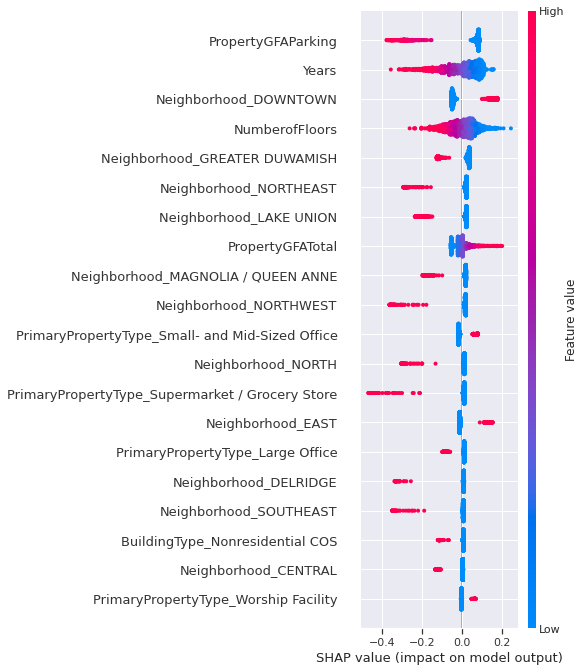

In [29]:
import sklearn
import shap
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(5,),activation='logistic', solver='adam', alpha=0.05, random_state=0).fit(X, y)


# explain the model's predictions using SHAP values
explainer = shap.KernelExplainer(nn.predict, X)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


In [30]:
# shap.dependence_plot("bmi", shap_values, X)

In [31]:
# shap.force_plot(explainer.expected_value, shap_values, X)

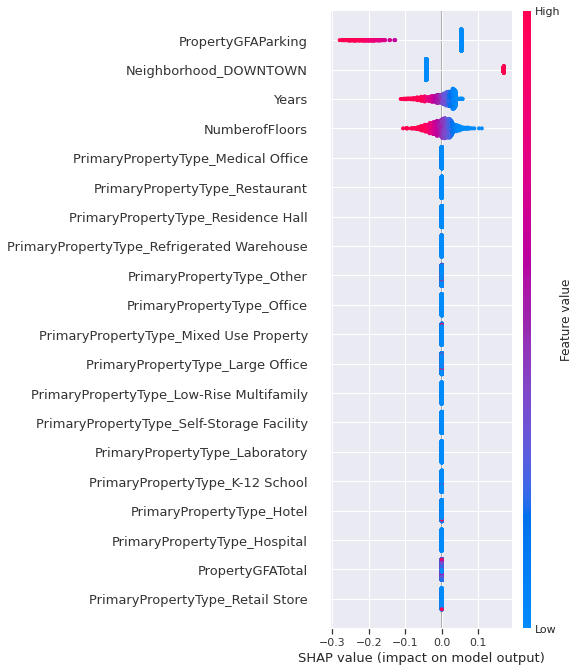

In [32]:
import sklearn
import shap
from sklearn.linear_model import LinearRegression
import numpy as np

  # train linear model
my_model =  sklearn.linear_model.Lasso(alpha=0.1, fit_intercept= True, random_state=0).fit(X, y)

# explain the model's predictions using SHAP values
explainer = shap.LinearExplainer(my_model, X)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

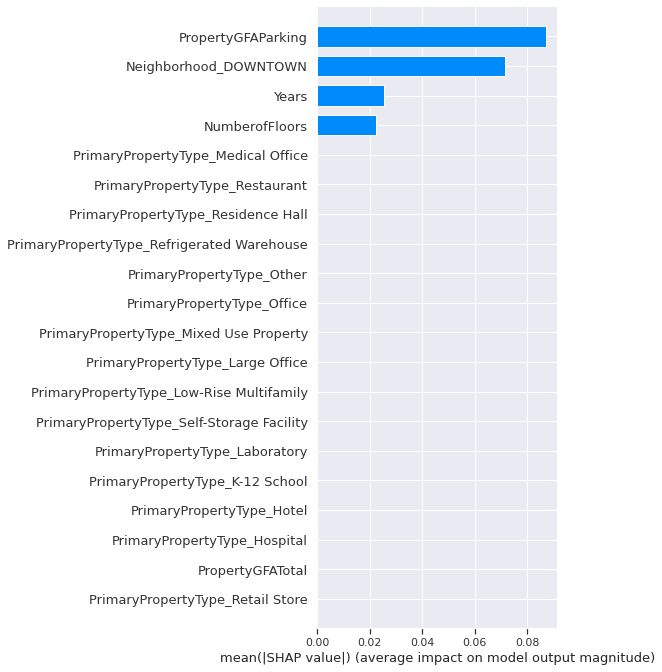

In [33]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [34]:
# shap.dependence_plot("OSEBuildingID", shap_values, X)

In [35]:
# shap.dependence_plot("Years", shap_values, X)

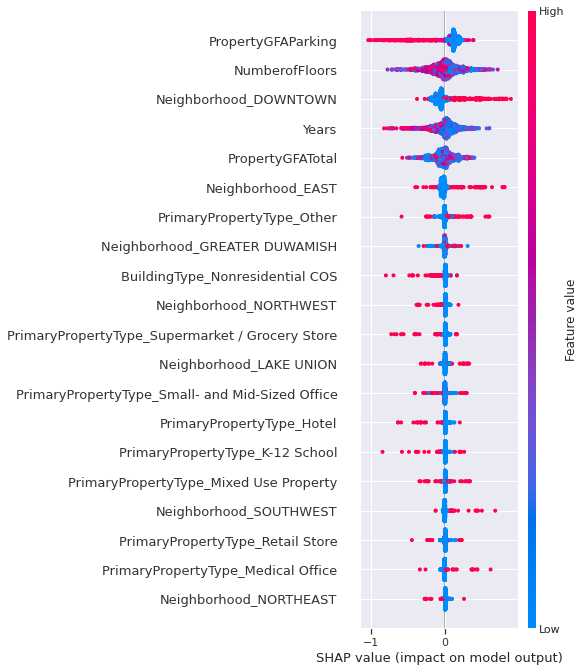

In [36]:
my_model = DecisionTreeRegressor(random_state=0).fit(X, y)

import shap
explainer = shap.TreeExplainer(my_model)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# 13. Conclusions : MLPR avec l'optimisation a performé mieux !

In [37]:
from sklearn.linear_model import Lasso

X = df.drop(['SiteEnergyUse(kBtu)'], axis = 1).values
X_columns = df.drop(['SiteEnergyUse(kBtu)'], axis = 1)
y = df['SiteEnergyUse(kBtu)'].astype(int)

print(X.shape)
print(y.shape)


# lasso = linear_model.Lasso(alpha = 0.01, fit_intercept = True)
nn = MLPRegressor(hidden_layer_sizes=(5,),activation='logistic', solver='adam', alpha=0.05, random_state=0).fit(X, y)

results=cross_val_score(nn,X,y,cv=5, scoring='r2')

# Model Accuracy on testing dataset
print('The R2 is: ', np.mean(results))

# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

(1563, 39)
(1563,)
The R2 is:  0.21592195761789248


# 14. Ajouter le parametre ENERGYSTARScore

In [38]:
Inicial_Data = pd.read_csv('/kaggle/input/seattle1/2016_Building_Energy_Benchmarking.csv')

In [39]:
Inicial_Data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [40]:
Inicial_Data = Inicial_Data.drop(['PropertyGFABuilding(s)'], axis=1)

# 15. Merge des donnees

In [41]:
df = df.copy()

In [42]:
dfstar = pd.merge(df, Inicial_Data, how='inner', left_index=True,
                     right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
dfstar.drop([i for i in df.columns if 'remove' in i],
               axis=1, inplace=True)

In [43]:
dfstar.head()

,SiteEnergyUse(kBtu),Years,PropertyGFATotal,NumberofFloors,PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors_remove,PropertyGFATotal_remove,PropertyGFAParking_remove,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu)_remove,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1.040081,0.371697,1.826690,0.653324,-0.516489,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,-1.056116,0.535721,1.705121,0.764441,1.707983,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,-0.235865,2.843835,3.607823,2.373136,2.302108,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.43219,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,9

In [44]:
dfstar= dfstar[['Years', 'PropertyGFATotal', 'NumberofFloors',
       'SiteEnergyUse(kBtu)', 'PropertyGFAParking',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'Neighborhood_CENTRAL',
       'Neighborhood_DELRIDGE', 'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST', 'ENERGYSTARScore']]

In [45]:
dfstar.isna().sum()

Years                                                0
PropertyGFATotal                                     0
NumberofFloors                                       0
SiteEnergyUse(kBtu)                                  0
PropertyGFAParking                                   0
PrimaryPropertyType_Hotel                            0
PrimaryPropertyType_K-12 School                      0
PrimaryPropertyType_Laboratory                       0
PrimaryPropertyType_Low-Rise Multifamily             0
PrimaryPropertyType_Medical Office                   0
PrimaryPropertyType_Mixed Use Property               0
PrimaryPropertyType_Other                            0
PrimaryPropertyType_Refrigerated Warehouse           0
PrimaryPropertyType_Residence Hall                   0
PrimaryPropertyType_Restaurant                       0
PrimaryPropertyType_Retail Store                     0
PrimaryPropertyType_Self-Storage Facility            0
PrimaryPropertyType_Senior Care Community            0
PrimaryPro

In [46]:
dfstar.shape

(1563, 38)

In [47]:
dfstar = dfstar.dropna(axis=0)
dfstar

,Years,PropertyGFATotal,NumberofFloors,SiteEnergyUse(kBtu),PropertyGFAParking,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,ENERGYSTARScore
0,0.371697,1.826690,0.653324,1.040081,-0.516489,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,60.0
1,0.535721,1.705121,0.764441,-1.056116,1.707983,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,61.0
2,2.843835,3.607823,2.373136,-0.235865,2.302108,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,43.0
3,-0.008526,1.572968,0.607397,1.070461,-0.516489,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,56.0
4,1.083899,2.403061,1.155447,-0.570042,2.035123,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,-1.677240,-1.016211,-0.942371,-0.873838,-0.516489,-0.226074,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,-0.546052,-0.284452,1.914594,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,92.0
1559,-1.403652,-1.016211,-0.859017,-1.299154,-0.516489,-0.226074,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,2.313797,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,53.0
1560,-1.606795,-1.016211,0.485018,-0.387764,-0.516489,-0.226074,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,2.313797,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.4783

In [48]:
dfstar.isna().sum()

Years                                              0
PropertyGFATotal                                   0
NumberofFloors                                     0
SiteEnergyUse(kBtu)                                0
PropertyGFAParking                                 0
PrimaryPropertyType_Hotel                          0
PrimaryPropertyType_K-12 School                    0
PrimaryPropertyType_Laboratory                     0
PrimaryPropertyType_Low-Rise Multifamily           0
PrimaryPropertyType_Medical Office                 0
PrimaryPropertyType_Mixed Use Property             0
PrimaryPropertyType_Other                          0
PrimaryPropertyType_Refrigerated Warehouse         0
PrimaryPropertyType_Residence Hall                 0
PrimaryPropertyType_Restaurant                     0
PrimaryPropertyType_Retail Store                   0
PrimaryPropertyType_Self-Storage Facility          0
PrimaryPropertyType_Senior Care Community          0
PrimaryPropertyType_Small- and Mid-Sized Offic

In [49]:
# Split the data into X & y

X = dfstar.drop(['SiteEnergyUse(kBtu)'], axis = 1)
X_columns = dfstar.drop(['SiteEnergyUse(kBtu)'], axis = 1)
y = dfstar['SiteEnergyUse(kBtu)'].astype(int)

print(X.shape)
print(y.shape)

(1167, 37)
(1167,)


# 18. Exécution de plusieurs modèles

In [50]:
# import libraries 
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn import tree, model_selection
import math


# models 
LR = linear_model.LinearRegression ()
LASSO = linear_model.Lasso ()
RIDGE = linear_model.Ridge ()
DTR = DecisionTreeRegressor ()
REG = GradientBoostingRegressor ()
MLPR = MLPRegressor ()


kf = model_selection.KFold(n_splits=5,shuffle=True, random_state=10)


# MSE = np.square(np.subtract(X,y)).mean() 
 
# RMSE = math.sqrt(MSE)

#RMSE -> Root Mean Square Error/Erreur quadratique moyenne -> (Des valeurs inférieures de RMSE indiquent un meilleur ajustement)
%time
print('')
print('RMSE')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Linear Regression: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Linear Regression: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Decision Tree chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Decision Tree : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Decision Tree : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" MLPRegressor chaque folds: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print ('')

#MAE -> mean of absolute error values/ average of the absolute error values (plus proche de 0 le meilleur)
%time
print('')
print('MAE')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Regression Linear: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Regression Linear: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" MAE Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')


print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" l'Arbre de décision chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, l'Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, l'Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" MLPRegressor chaque plis: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyen, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print ('')
      
#r2 -> coefficient of determination/coefficient de détermination (The closer the value of r-square to 1, the better is the model fitted)
%time
print('')
print('R2')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne Linear, Regression : {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Linear Regression : {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, Lasso : {cross_val_score(LASSO, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Lasso : {cross_val_score(LASSO, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne,Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Arbre de décision chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" MLPRegressor chaque plis: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2').std()}")
# print(f" KNeighbors : {np.sqrt(-cross_val_score(KNR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs

RMSE

 Linear Regression chaque plis: [-0.304873 -0.367126 -0.308568 -0.320824 -0.357186]
 Moyenne, Linear Regression: -0.33171559564787156
 Standard Deviation, Linear Regression: 0.025603217081903596

 Lasso chaque plis: [-0.425564 -0.457601 -0.427385 -0.427385 -0.446074]
 Moyenne, Lasso : -0.43680164404693966
 Standard Deviation, Lasso : 0.012823501792381599

 Ridge chaque plis: [-0.304894 -0.367059 -0.308430 -0.320812 -0.357060]
 Moyenne, Ridge : -0.33165096408665307
 Standard Deviation, Ridge : 0.025581306823355382

 Decision Tree chaque plis: [-0.713675 -0.679487 -0.557940 -0.669528 -0.699571]
 Moyenne, Decision Tree : -0.6666043065184695
 Standard Deviation, Decision Tree : 0.04958477169941182

 GradientBoostingRegressor chaque plis: [-0.315327 -0.360138 -0.302238 -0.324479 -0.352319]
 Moyenne, GradientBoostingRegressor : -0.3304584000823089
 Standard Deviation, GradientBoostingRegressor : 0.02318585525052649

 MLPR

# 19. Réglage des hyperparamètres

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
# warnings.simplefilter("ignore", UserWarning)
# # warnings.warn("once")
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import parallel_backend

# Add a dict of estimator and estimator related parameters in this list
parameters_grid = [
                    {'estimator': [linear_model.LinearRegression()], 
                     'estimator__fit_intercept': [True, False]},
                
                    {'estimator': [linear_model.Lasso()], 
                     'estimator__alpha': [1,0.9,0.75,0.5,0.1,0.01,0.001,0.0001],
                     'estimator__fit_intercept': [True, False]},


                    {'estimator': [linear_model.Ridge()], 
                     'estimator__alpha': [1,0.9,0.75,0.5,0.1,0.01,0.001,0.0001],
                     'estimator__fit_intercept': [True, False]},
    
                    {'estimator': [GradientBoostingRegressor()], 
                     'estimator__loss':["ls", "lad","huber","quantile"],
                        'estimator__learning_rate':[0.001,1000],
                        'estimator__n_estimators':[100,1000],
                        'estimator__criterion': ["friedman_mse", "squared_error", "squared_error"]},

                   {'estimator': [MLPRegressor()],
                    'estimator__hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
                            'estimator__max_iter': [200],
                            'estimator__activation': ['identity','logistic','tanh', 'relu'],
                            'estimator__solver': ['sgd','adam'],
                            'estimator__alpha': [0.0001, 0.05],
                            'estimator__learning_rate': ['constant','invscaling','adaptive']},
    
                    {'estimator': [DecisionTreeRegressor()],
                     'estimator__splitter':["best","random"], 
                        'estimator__max_depth': [1,3,5,7,9,11,12], 
                        'estimator__max_features': ["auto","log2","sqrt",None], 
                        'estimator__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10], 
                        'estimator__min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
                        'estimator__max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]},

                    ]

estimators = []
scores = []
params = []

for ele in parameters_grid:
    if __name__ == "__main__":
        warnings.filterwarnings("ignore")
        grid = GridSearchCV(Pipeline(steps=[('estimator', ele['estimator'][0])]),param_grid={key:value for key, value in ele.items() if key != 'estimator'},cv = 5, n_jobs=-1, scoring='r2')
        with parallel_backend('multiprocessing'):
            grid.fit(X,y)
        Estimator = str(ele['estimator'])
        Best_Params = str(grid.best_params_)
        Best_Score = str(grid.best_score_)
        estimators.append(Estimator)
        scores.append(Best_Score)
        params.append(Best_Params)
        z = max(scores)
        index = scores.index(z)
        model = estimators[index]
        par = params[index]
    print('Estimator: ' + str(ele['estimator']))
    print('Best Params: ' + str(grid.best_params_))
    print('Best Score: ' + str(grid.best_score_))
    print('')
    print('')

print('The Best Estimator and Score is {} {} {}' .format(model, par, max(scores)))


Estimator: [LinearRegression()]
Best Params: {'estimator__fit_intercept': True}
Best Score: 0.19491364283183615


Estimator: [Lasso()]
Best Params: {'estimator__alpha': 0.01, 'estimator__fit_intercept': False}
Best Score: 0.21431203281514652


Estimator: [Ridge()]
Best Params: {'estimator__alpha': 1, 'estimator__fit_intercept': True}
Best Score: 0.19512430420007837


Estimator: [GradientBoostingRegressor()]
Best Params: {'estimator__criterion': 'friedman_mse', 'estimator__learning_rate': 0.001, 'estimator__loss': 'huber', 'estimator__n_estimators': 1000}
Best Score: 0.1586395718928359


Estimator: [MLPRegressor()]
Best Params: {'estimator__activation': 'logistic', 'estimator__alpha': 0.05, 'estimator__hidden_layer_sizes': (100, 50, 30), 'estimator__learning_rate': 'invscaling', 'estimator__max_iter': 200, 'estimator__solver': 'adam'}
Best Score: 0.19972080065856418


Estimator: [DecisionTreeRegressor()]
Best Params: {'estimator__max_depth': 7, 'estimator__max_features': None, 'estimato

# 20. Valuers Shap 

In [52]:
# # Import the library required in this example
# # Create the Neural Network regression model:
# from sklearn.neural_network import MLPRegressor
# nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
# nn.fit(X, y)
# print(nn.predict)

# # Use Shap explainer to interpret values in the test set:
# explainer = shap.KernelExplainer(nn.predict, X)
# shap_values = explainer.shap_values(X)

# # Plot the Shap values:
# shap.summary_plot(shap_values, X)

In [53]:
# shap.dependence_plot("bmi", shap_values, X)

In [54]:
X

,Years,PropertyGFATotal,NumberofFloors,PropertyGFAParking,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,ENERGYSTARScore
0,0.371697,1.826690,0.653324,-0.516489,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,60.0
1,0.535721,1.705121,0.764441,1.707983,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,61.0
2,2.843835,3.607823,2.373136,2.302108,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,43.0
3,-0.008526,1.572968,0.607397,-0.516489,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,56.0
4,1.083899,2.403061,1.155447,2.035123,4.423323,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,-1.677240,-1.016211,-0.942371,-0.516489,-0.226074,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,-0.546052,-0.284452,1.914594,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,92.0
1559,-1.403652,-1.016211,-0.859017,-0.516489,-0.226074,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,2.313797,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573,53.0
1560,-1.606795,-1.016211,0.485018,-0.516489,-0.226074,-0.168195,-0.080244,-0.043853,-0.15997,-0.279161,2.313797,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,-0.546052,-0.284452,-

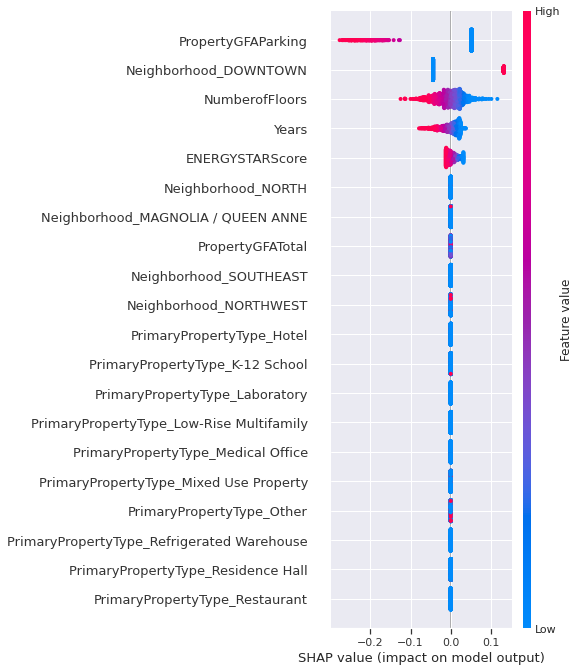

In [55]:
import sklearn
import shap
from sklearn.linear_model import LinearRegression
import numpy as np

  # train linear model
my_model =  sklearn.linear_model.Lasso(alpha=0.1, fit_intercept= True,random_state=0).fit(X, y)

# explain the model's predictions using SHAP values
explainer = shap.LinearExplainer(my_model, X)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

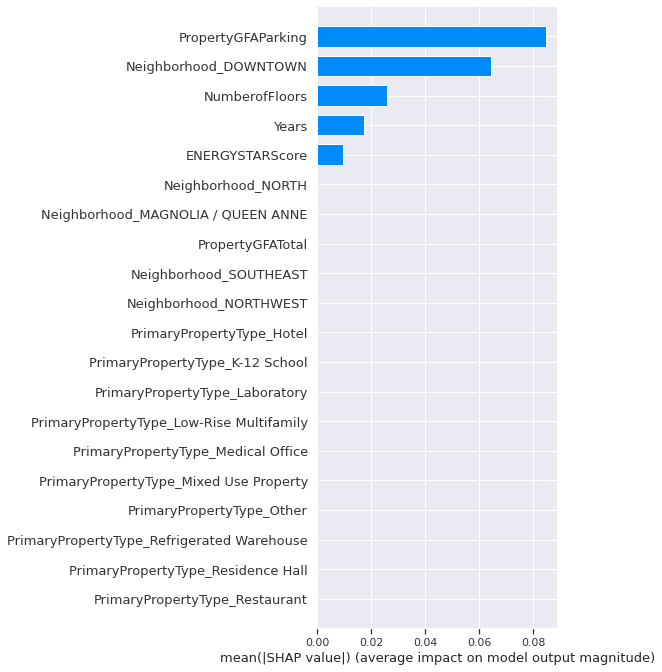

In [56]:
shap.summary_plot(shap_values, X, plot_type="bar")

# 21. Best Model with Energy Score parameter 

In [57]:
from sklearn.linear_model import Ridge

X = dfstar.drop(['SiteEnergyUse(kBtu)'], axis = 1).values
X_columns = dfstar.drop(['SiteEnergyUse(kBtu)'], axis = 1)
y = dfstar['SiteEnergyUse(kBtu)'].astype(int)

print(X.shape)
print(y.shape)


lasso = linear_model.Lasso(alpha = 0.01, fit_intercept = True)

results=cross_val_score(lasso,X,y,cv=5, scoring='r2')

# Model Accuracy on testing dataset
print('The R2 is: ', np.mean(results))
# print('The RMSE is: ',sqrt(mean_squared_error(y,results.predict(X)))
# print('The MAE is: ',mean_absolute_error(y,results.predict(X))

# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

(1167, 37)
(1167,)
The R2 is:  0.21030130368829375


# Notes:

The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

The R Square is measure of how close the data are to the fitted regression line.

In this case we can say that our model explains 56% of the training data & 61% of the testing data

The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

Coeff are the weights

The intercept is the expected mean value of Y when all X=0